<a href="https://colab.research.google.com/github/david-paul-m/Python-EDA/blob/main/David_PY_EDA_AirBnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - AirBnb Bookings Analysis



##**Project Type**    - EDA Project
##**Contribution**    - Individual
##**Name**            - David Paul M



# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/david-paul-m/Python-EDA/blob/main/David_PY_EDA_AirBnb_Bookings_Analysis.ipynb

# **Problem Statement**


# **To get appropriate insights on how the general Airbnb bookings in NYC are, we would be deep diving into the dataset by tackling the below mentioned problem statements:**
1.	What are the most popular neighbourhoods for Airbnb listings in NYC?
2.	How does price vary for each neighbourhood?
3.	How does the price vary by room type and neighbourhood? 
4.	What’s the average minimum nights in each neighbourhood?
5.	Is there a relation between number of reviews and listings?
6.	Find the correlation between availability and number of reviews, price, room type, neighbourhood group
7.	What’s the average reviews per month and how does it vary basis neighbourhood and room type? 
8.	How does the calculated host listings count vary by neighbourhood and room type?



#### **Define Your Business Objective?**

The objective of this project is to obtain insights and possibly provide recommendations to Airbnb hosts in NYC on how to optimize their listings and pricing strategies, based on the trends and patterns observed in the data. By understanding which neighbourhoods, room types, and other factors are most strongly correlated with higher prices, and reviews, hosts can better target their ideal guests and maximize their profits.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
airbnb_df = pd.read_csv('/content/drive/MyDrive/Almabetter Project/PY EDA/Airbnb NYC 2019.csv')

### Dataset First View

In [5]:
# Dataset First Look
airbnb_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
airbnb_df.shape

(48895, 16)

### Dataset Information

In [7]:
# Dataset Info
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
airbnb_df.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
airbnb_df.isna().sum().sort_values(ascending = False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: >

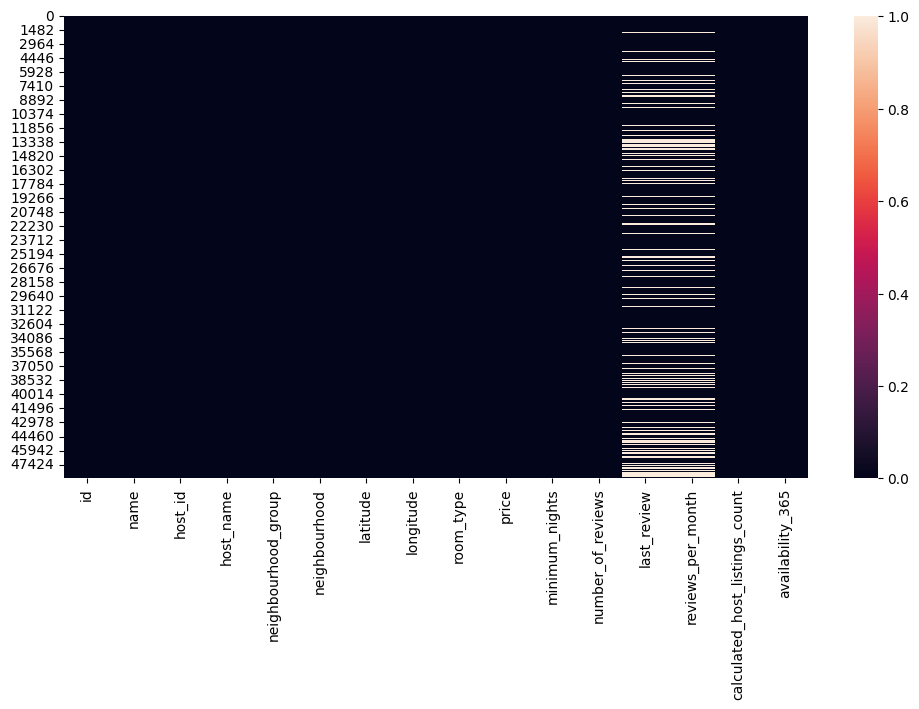

In [10]:
# Visualizing the missing values
plt.figure(figsize = (12,6))
sns.heatmap(airbnb_df.isna())

### What did you know about your dataset?

The following are the initial overview of the dataset:


*   The dataset has 48895 observations (rows) and 16 variables (columns).
*   There are 6 numeric columns and 10 categorical columns.
*   4 columns have null values out of which the 'last_review' and 'reviews_per_month' have 10052 null values. Columns 'host_name' and 'name' have 21 and 16 null values respectively.
*   There are no duplicate observations.






## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [12]:
# Dataset Describe
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description 

1.	id: unique identification number of the listing
2.	name: title or name of the listing
3.	host_id: unique identification number of the host
4.	host_name: name of the host
5.	neighbourhood_group: borough or area of the listing
6.	neighbourhood: specific neighborhood of the listing
7.	latitude: geographic coordinate of the listing
8.	longitude: geographic coordinate of the listing
9.	room_type: type of room available for booking (Entire home/apt,Private room, Shared room)
10.	price: nightly price for the listing
11.	minimum_nights: minimum number of nights required for a booking
12.	number_of_reviews: total number of reviews the listing has received
13.	last_review: date of the last review for the listing
14.	reviews_per_month: average number of reviews per month for the listing
15.	calculated_host_listings_count: total number of listings the host has
16.	availability_365: number of days the listing is available for booking within the next 365 days.


### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in airbnb_df.columns:
  print(f"The number of unique values in column '{i}' is {airbnb_df[i].nunique()}")

The number of unique values in column 'id' is 48895
The number of unique values in column 'name' is 47905
The number of unique values in column 'host_id' is 37457
The number of unique values in column 'host_name' is 11452
The number of unique values in column 'neighbourhood_group' is 5
The number of unique values in column 'neighbourhood' is 221
The number of unique values in column 'latitude' is 19048
The number of unique values in column 'longitude' is 14718
The number of unique values in column 'room_type' is 3
The number of unique values in column 'price' is 674
The number of unique values in column 'minimum_nights' is 109
The number of unique values in column 'number_of_reviews' is 394
The number of unique values in column 'last_review' is 1764
The number of unique values in column 'reviews_per_month' is 937
The number of unique values in column 'calculated_host_listings_count' is 47
The number of unique values in column 'availability_365' is 366


In [14]:
#Checking unique values of columns neighbourhood_group and room_type:
print(airbnb_df['neighbourhood_group'].unique())
print(airbnb_df['room_type'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
['Private room' 'Entire home/apt' 'Shared room']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [15]:
#Removing columns host_id and last_review as they are not necessary for the analysis and saving it as a new dataframe:
df1 = airbnb_df.drop(['host_id','last_review'],axis=1)
df1.head(3)

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [16]:
df1.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<Axes: ylabel='availability_365'>

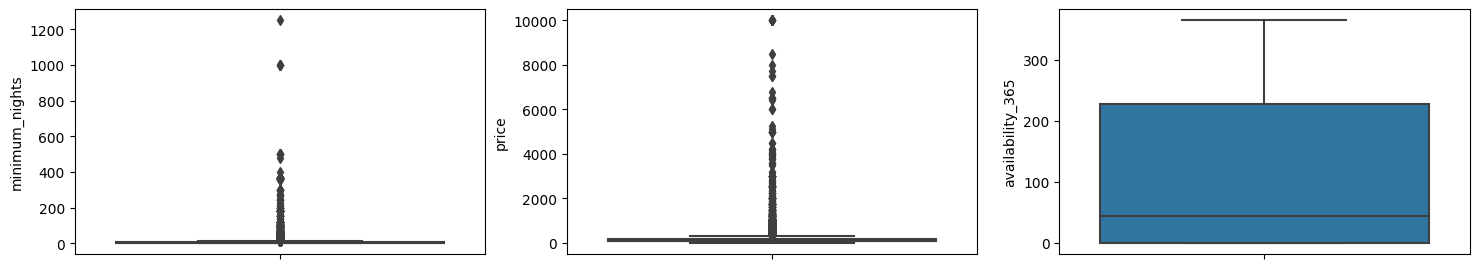

In [24]:
#Checking for outliers:
plt.figure(figsize = (18,7))
plt.subplot(2,3,1)
sns.boxplot(y = df1['minimum_nights'])
plt.subplot(2,3,2)
sns.boxplot(y = df1['price'])
plt.subplot(2,3,3)
sns.boxplot(y = df1['availability_365'])

In [18]:
#Count of listings that have availaibity 0:
print(df1[df1['availability_365']==0]['availability_365'].count())
df1[df1['availability_365']==0]['availability_365']

17533


4        0
6        0
8        0
14       0
20       0
        ..
48550    0
48731    0
48756    0
48760    0
48779    0
Name: availability_365, Length: 17533, dtype: int64

In [25]:
#Assigning the minimum_nights value to the availability for those listings that have availability 0:
df1.loc[df1['availability_365']==0,'availability_365'] = df1['minimum_nights']

In [26]:
#Count of number of listings that have minimum heights greater than its corresponding availability
print(df1[df1['minimum_nights']>df1['availability_365']]['minimum_nights'].count())
df1.loc[df1['minimum_nights']>df1['availability_365'],['minimum_nights','availability_365']]

833


,minimum_nights,availability_365
105,30,9
135,29,12
143,2,1
152,3,1
183,4,1
...,...,...
47948,2,1
47971,5,4
48446,365,342
48485,5,4


In [27]:
#Assigning the availabilityminimum_nights value to the minimum_nights for those listings that have minimum_nights greater than its availability:
df1.loc[df1['minimum_nights']>df1['availability_365'],'minimum_nights'] = df1['availability_365']

In [28]:
df1.loc[df1['minimum_nights']>df1['availability_365'],['minimum_nights','availability_365']]

,minimum_nights,availability_365


In [ ]:
#Listings that are priced 0:
df1[df1['price']==0]['price']

23161    0
25433    0
25634    0
25753    0
25778    0
25794    0
25795    0
25796    0
26259    0
26841    0
26866    0
Name: price, dtype: int64

In [29]:
# Removing those listingsd that are priced 0:
df1.drop(df1[df1['price']==0].index, inplace = True)

### What all manipulations have you done and insights you found?

1.  Identified outliers in the price and minimum night variables.
2.  Some of the listings had 0 days as availability while its corresponding minimum night values were more than 0. Replacing such observations of the availability variable with its corresponding minimum night value.
3.  Replaced those observations of the minimum nights variable which were greater than its corresponding availabilty values with the availabilty values
4.  11 listings were priced 0 and hence were removed from the dataset. 


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Most popular neighbourhood group for Airbnb listings

Text(0.5, 1.0, 'Distribution of Airbnb listings')

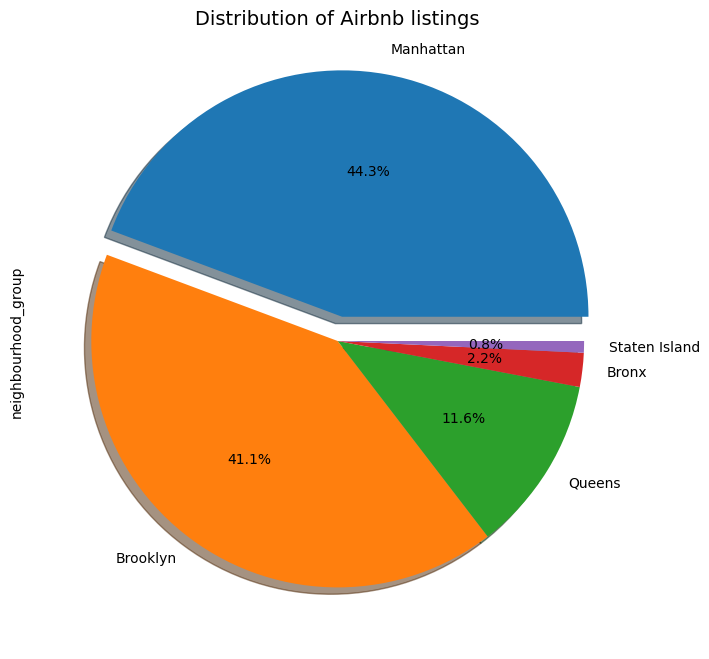

In [105]:
# Chart - 1 visualization code
chart1_df = df1['neighbourhood_group'].value_counts()
chart1_df.plot.pie(explode = [0.1, 0, 0, 0, 0], autopct='%1.1f%%',figsize = (10,8), fontsize = 10, shadow = True);
plt.title('Distribution of Airbnb listings', fontsize = 14)

##### 1. Why did you pick the specific chart?

Pie Charts are often used to represent propotions of categorical data. Here the intension was to display the neighbourhood group that had the highest percentage of listings. Pie charts are effective at showing the relative sizes of each category in a simple and easy-to-read format. They also allow for easy comparison of the proportions of different categories. Here, you can see at a glance that Manhattan has the largest proportion of Airbnb listings among the different neighborhood groups, while Staten Island has the smallest proportion. Also, in cases such as these, pie charts are the best pick as the total number of categories are not too many which would make the pie chart unreadable. 

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can easily conclude that Manhattan has the highest number of listings (44.3%) followed by Brooklyn (41.1%) and Staten Island has the least number of listings(0.8%).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially help create a positive business impact, as it provides information on where Airbnb listings are concentrated within New York City. Hosts and potential investors may find this information useful for identifying areas with high demand and potentially higher profitability. Additionally, it may be useful for Airbnb's marketing and advertising efforts to target specific neighborhoods or areas with higher listings.

However it is important to consider all factors into acoount when concluding the postive and negative growth impact. The distribution alone cannot justify reasons for negative growth as factors such as economic condition and tourisim also play an important role. Hence it is important to consider a variety of factors that could potentially impact business growth both positively and negatively.

#### Chart - 2 Variation of price for each neighbourhood

In [141]:
# Chart - 2 visualization code

#Creating a dataframe with the average prices for each neighbourhood_group:
temp_df = df1.groupby('neighbourhood_group')['price'].mean().round(2).reset_index().rename(columns={'price':'avg_price'})

#Merging the above dataframe with the main dataframe to get the avg_price column for scatter plot:
ch2_df = pd.merge(df1,temp_df, how='inner', on='neighbourhood_group')

neighbourhood_group
Manhattan        196.88
Brooklyn         124.44
Staten Island    114.81
Queens            99.52
Bronx             87.58
Name: avg_price, dtype: float64


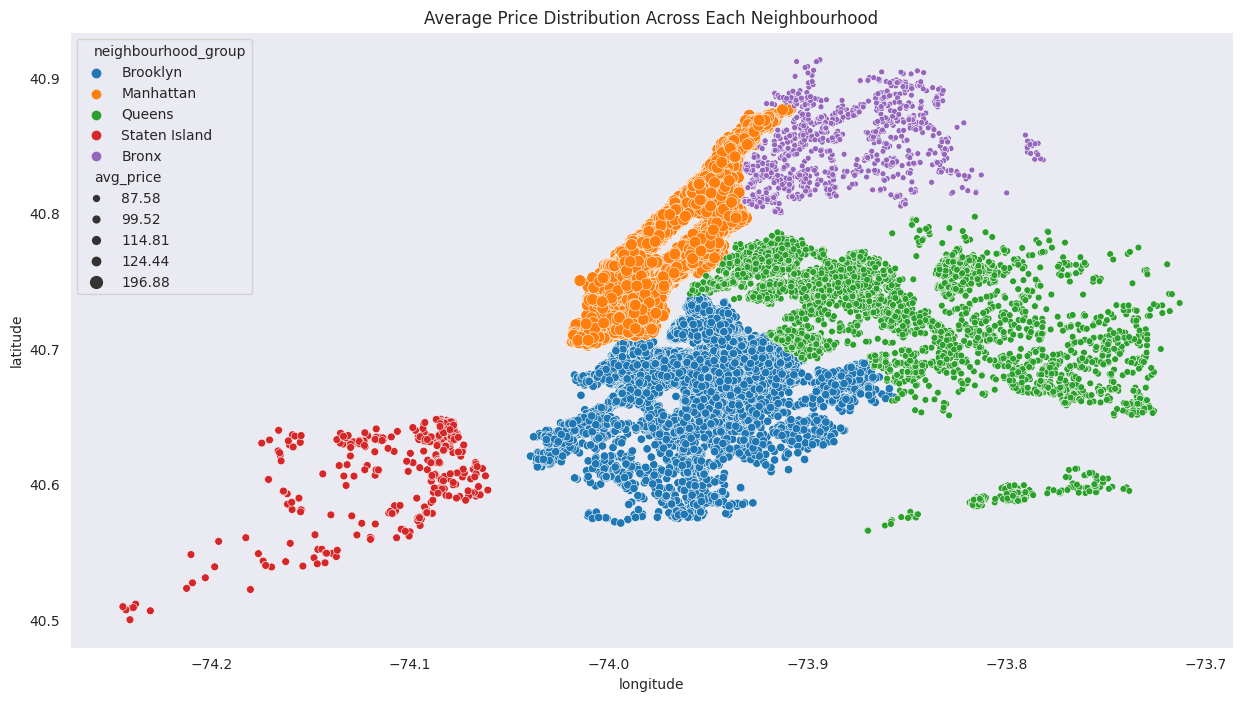

In [243]:
#Printing the average price for each neighbourhood group:
print(ch2_df.groupby('neighbourhood_group')['avg_price'].mean().sort_values(ascending=False))

#Plotting a scatter plot using the longitudes and latitudes, with each neighbourhood having a separate colour and marker size varying basis the average price:
plt.figure(figsize=(15,8))
sns.scatterplot(data=ch2_df, x='longitude', y='latitude', hue='neighbourhood_group', size='avg_price')
plt.title('Average Price Distribution Across Each Neighbourhood', fontsize=12);

##### 1. Why did you pick the specific chart?

A scatter plot provides a clear visual representation of the relationship between to variables. The colour of the markers represents the neighbourhood group, and the size of the markers represents the average price of the group. By using different colour for each neighbourhood group, it becomes easy to compare and contrast the price ranges of each group. The larger the marker size is, the more expensive is the average price for that neighbourhood. 

##### 2. What is/are the insight(s) found from the chart?

Its observed that Manhattan has the highest average price of 196.88 dollars per night followed by Brooklyn at 124.44 dollars per night and Staten Island at 114.81 dollars per night. Manhattan being the most popular is also the most expensive area.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This would definitely help gain a positive impact as by understanding the average prices in each neighborhood, hosts can adjust their prices to be competitive and attract more guests. They can also invest in those neighbourhoods that have low average price but high demand and increase their profits.

It seems that Staten Islands which has the least number of listings and least popular has the third highest average price. This could either mean that the hosts in this area have priced their properties too high which could lead to a potential negative growth or the properties in this area are huge luxury homes which are expensive. To get a clear understanding of this we will have to dive deep into the property types. In general, hosts should find the right balance between the demand in an area and its average price when deciding on the price to ensure maximum profits. 

#### Chart - 3 Price variation with room type and neighbourhood

In [194]:
# Chart - 3 visualization code

#Creating a dataframe of grouped observations by neighbourhood and room type and their corresponding average price per night:
group_price = df1.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()

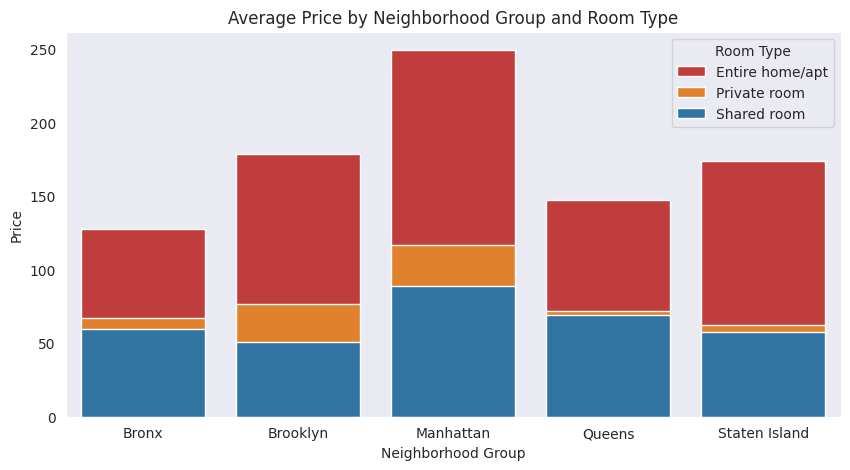

In [244]:
#Plotting a bar graph for the above dataframe:
plt.figure(figsize=(10,5))
sns.barplot(data=group_price, x=group_price.index, y='Entire home/apt', color='tab:red', label='Entire home/apt')
sns.barplot(data=group_price, x=group_price.index, y='Private room', color='tab:orange', label='Private room')
sns.barplot(data=group_price, x=group_price.index, y='Shared room', color='tab:blue', label='Shared room')

#Labelling the title, legend and axes:
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.title('Average Price by Neighborhood Group and Room Type')
plt.legend().set_title('Room Type')

##### 1. Why did you pick the specific chart?

Stacked bar chart helps represent the average price of all three room types for each neighbourhood in a much concise and visually easy to understand way. The stacked bar chart is best for data with 2 categorical variables and 1 numeric variable.

##### 2. What is/are the insight(s) found from the chart?

From the above visual, we can conculude that 'entire home/apt' type rooms are the most expensive across all neighbourhoods followed by private rooms and shared rooms. 

As identified earlier Manhattan has all three room types priced the highest. Brooklyn which had the 2nd highest average price has the least price for shared rooms compared to all other neighbouhoods. 

Staten Island which was the 3rd highest in average price has its 'shared' and 'private' rooms priced almost the same, but its 'entire home/apt' rooms are priced way too high, almost the same as Brooklyn wile being the least popular neighbourhood in the listings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained tells us that the 2 most popular neighbourhoods (Manhattan and Brooklyn) have their 'entire home/apt' rooms priced more than double their 'shared' and 'private' room prices. Since they have the most number of listings and prices the highest it’s safe to say that the high demand equates to hosts pricing their properties at high price, which is a positive business impact. 

On the other had we can see that Bronx, Queens and Staten Island have very less difference in their price for 'shared rooms' and 'private rooms' which makes the options less for guests as they would rather prefer a private room as both almost costs the same. The pricing for these 2 types of rooms could be reviewed by the hosts. Also, Staten Island being the area with least number of listings has its 'entire home/apt' priced too high. Since there is less demand here, the optimal pricing should be much cheaper and hence this could be causing a potential negative growth in this neighbourhood.


#### Chart - 4 Average Minimum Nights in each Neighbourhood

In [245]:
# Chart - 4 visualization code

#Creating a dataframe with just the grouped mean values of minimum nights for variables neighbourhood group and room type:
min_nights = df1.groupby(['neighbourhood_group','room_type'])['minimum_nights'].mean().round(2).reset_index()
print(min_nights)

   neighbourhood_group        room_type  minimum_nights
0                Bronx  Entire home/apt            5.86
1                Bronx     Private room            3.85
2                Bronx      Shared room            3.37
3             Brooklyn  Entire home/apt            6.19
4             Brooklyn     Private room            5.26
5             Brooklyn      Shared room            7.64
6            Manhattan  Entire home/apt           10.05
7            Manhattan     Private room            5.26
8            Manhattan      Shared room            5.42
9               Queens  Entire home/apt            5.01
10              Queens     Private room            4.92
11              Queens      Shared room            3.85
12       Staten Island  Entire home/apt            6.11
13       Staten Island     Private room            3.63
14       Staten Island      Shared room            2.33


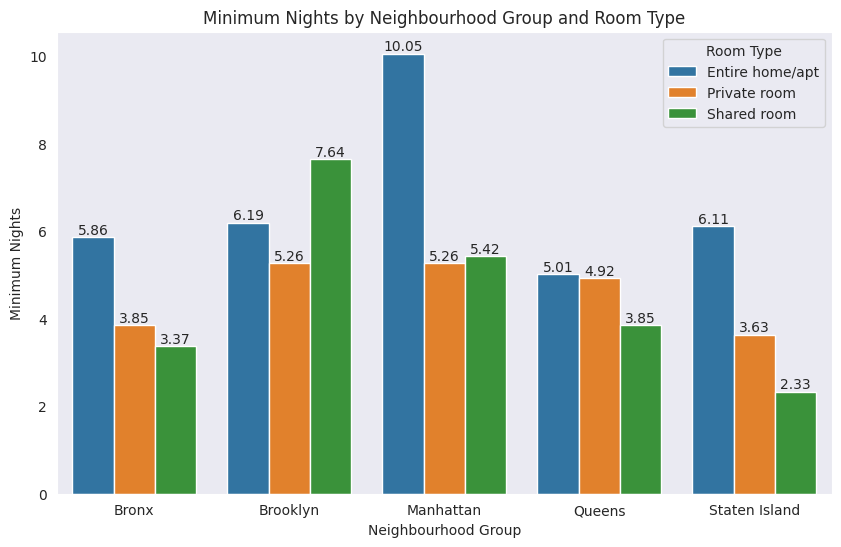

In [246]:
#Plotting a bar graph for the dataframe created above:

sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=min_nights, x='neighbourhood_group', y='minimum_nights', hue='room_type')

#Labelling the containers/bars inside the graph:
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge');
ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge');
ax.bar_label(ax.containers[2], fmt='%.2f', label_type='edge');

#Labelling the title, legend and axes:
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Minimum Nights')
ax.set_title('Minimum Nights by Neighbourhood Group and Room Type', fontsize = 12)
ax.legend().set_title('Room Type');

##### 1. Why did you pick the specific chart?

Bar graph is one of the best ways to represent a numeric value across various categories. Here the intention behind this visual is to represent the average minimum nights for each room type in each neighbourhood area. This graph does it best as it makes the data standout and easy to read.

##### 2. What is/are the insight(s) found from the chart?

Manhattan has the highest minimum nights for room type 'Entire home/apt' compared to all other neighbourhoods. The number of minimum nights varies based on the property and from the above graph we can see that Manhattan and Brooklyn have more than the general average minimum nights for all neighbourhoods. This would mean that the properties in Manhattan and Brooklyn are probably luxury stays which have the requirement of staying at least 6-10 nights.

Other general trends that can be spotted is that in Bronx, Queens and Staten Islands, the minimum nights is highest for 'Entire home/apt' type rooms followed by 'Private rooms' and 'Shared rooms'.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Now that we understand what the minimum nights are for various property types acorss each neighbourhood, we can cater the customers better by understanding the demands of customers who choose a type or room type basis their requirements. The business can also provide with packages for longer stays which will help have a positive growth.

There aren't any solid insights that lead to a negative growth based on the above chart alone.

#### Chart - 5 Number of REviews by Neighbourhood and Room Type

In [256]:
# Chart - 5 visualization code

#Creating a dataframe for total reivews by neighbourhood and room type:
total_reviews = df1.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].sum().unstack()
total_reviews

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,11627,16257,432
Brooklyn,267125,213341,5786
Manhattan,235147,209150,10272
Queens,60644,93561,2745
Staten Island,5857,5670,14


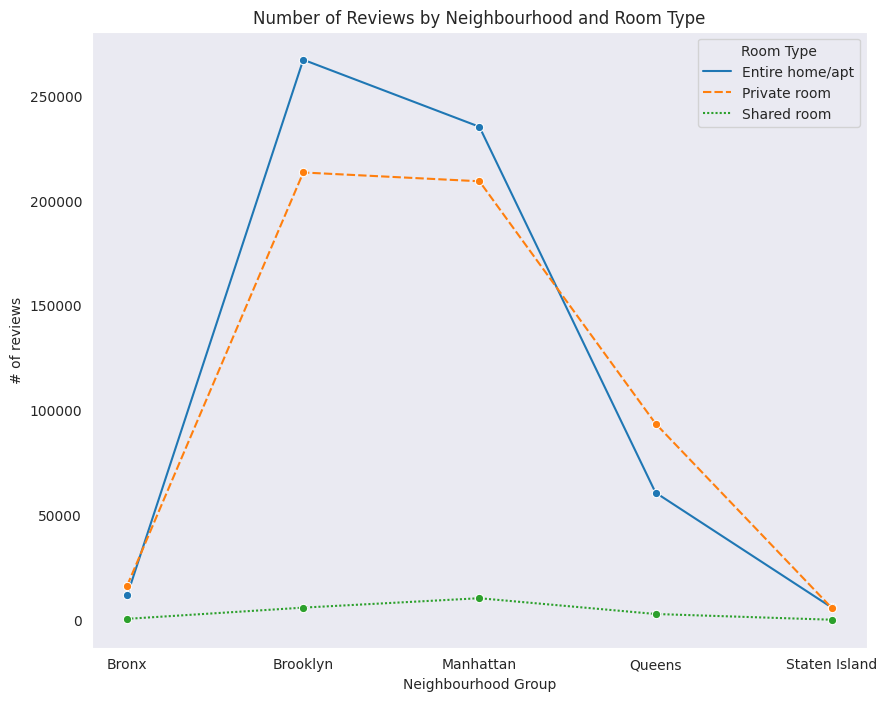

In [311]:
#Plotting a line graph for number of reviews by neighbourhood and room type:
sns.set_style('dark')
plt.figure(figsize=(10,8))
sns.lineplot(data=total_reviews,marker='o')

#Renaming the title, legend, x and y axis:
plt.xlabel('Neighbourhood Group')
plt.ylabel('# of reviews')
plt.title('Number of Reviews by Neighbourhood and Room Type', fontsize = 12);
plt.legend(title='Room Type');

##### 1. Why did you pick the specific chart?

This data is of the number of reviews each type of rooms have received across each neighbourhood. The line graph can represent this best as it makes it easy to visualize the number of reviews for each neighbourhood and comparing that with types of rooms, represented by the three types on lines in the graph.

##### 2. What is/are the insight(s) found from the chart?

The most desired room type with the highest number of reviews is the 'Entire home/apt' type rooms. Customers desire to stay in 'Entire home/apt' rooms the most followed by 'Private rooms' in Manhattan and Brooklyn. Whereas in Bronx and Queens, customers prefer 'Private rooms' more than 'Entire home/apt' judging by the number of reviews they have. One common factor is customers don't prefer 'shared rooms' much across all neighbourhoods. This could also be due to the less number of 'shared room' listings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We could look more into the possibility of customers prefering Private rooms more in Bronx and Queens, over the 'Entire home/apt' type properties. This could be due to the pricing as in these 2 areas, the cost of private rooms is almost half the price of 'Entire home/apt'

No insights that lead to a negative growth. 

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

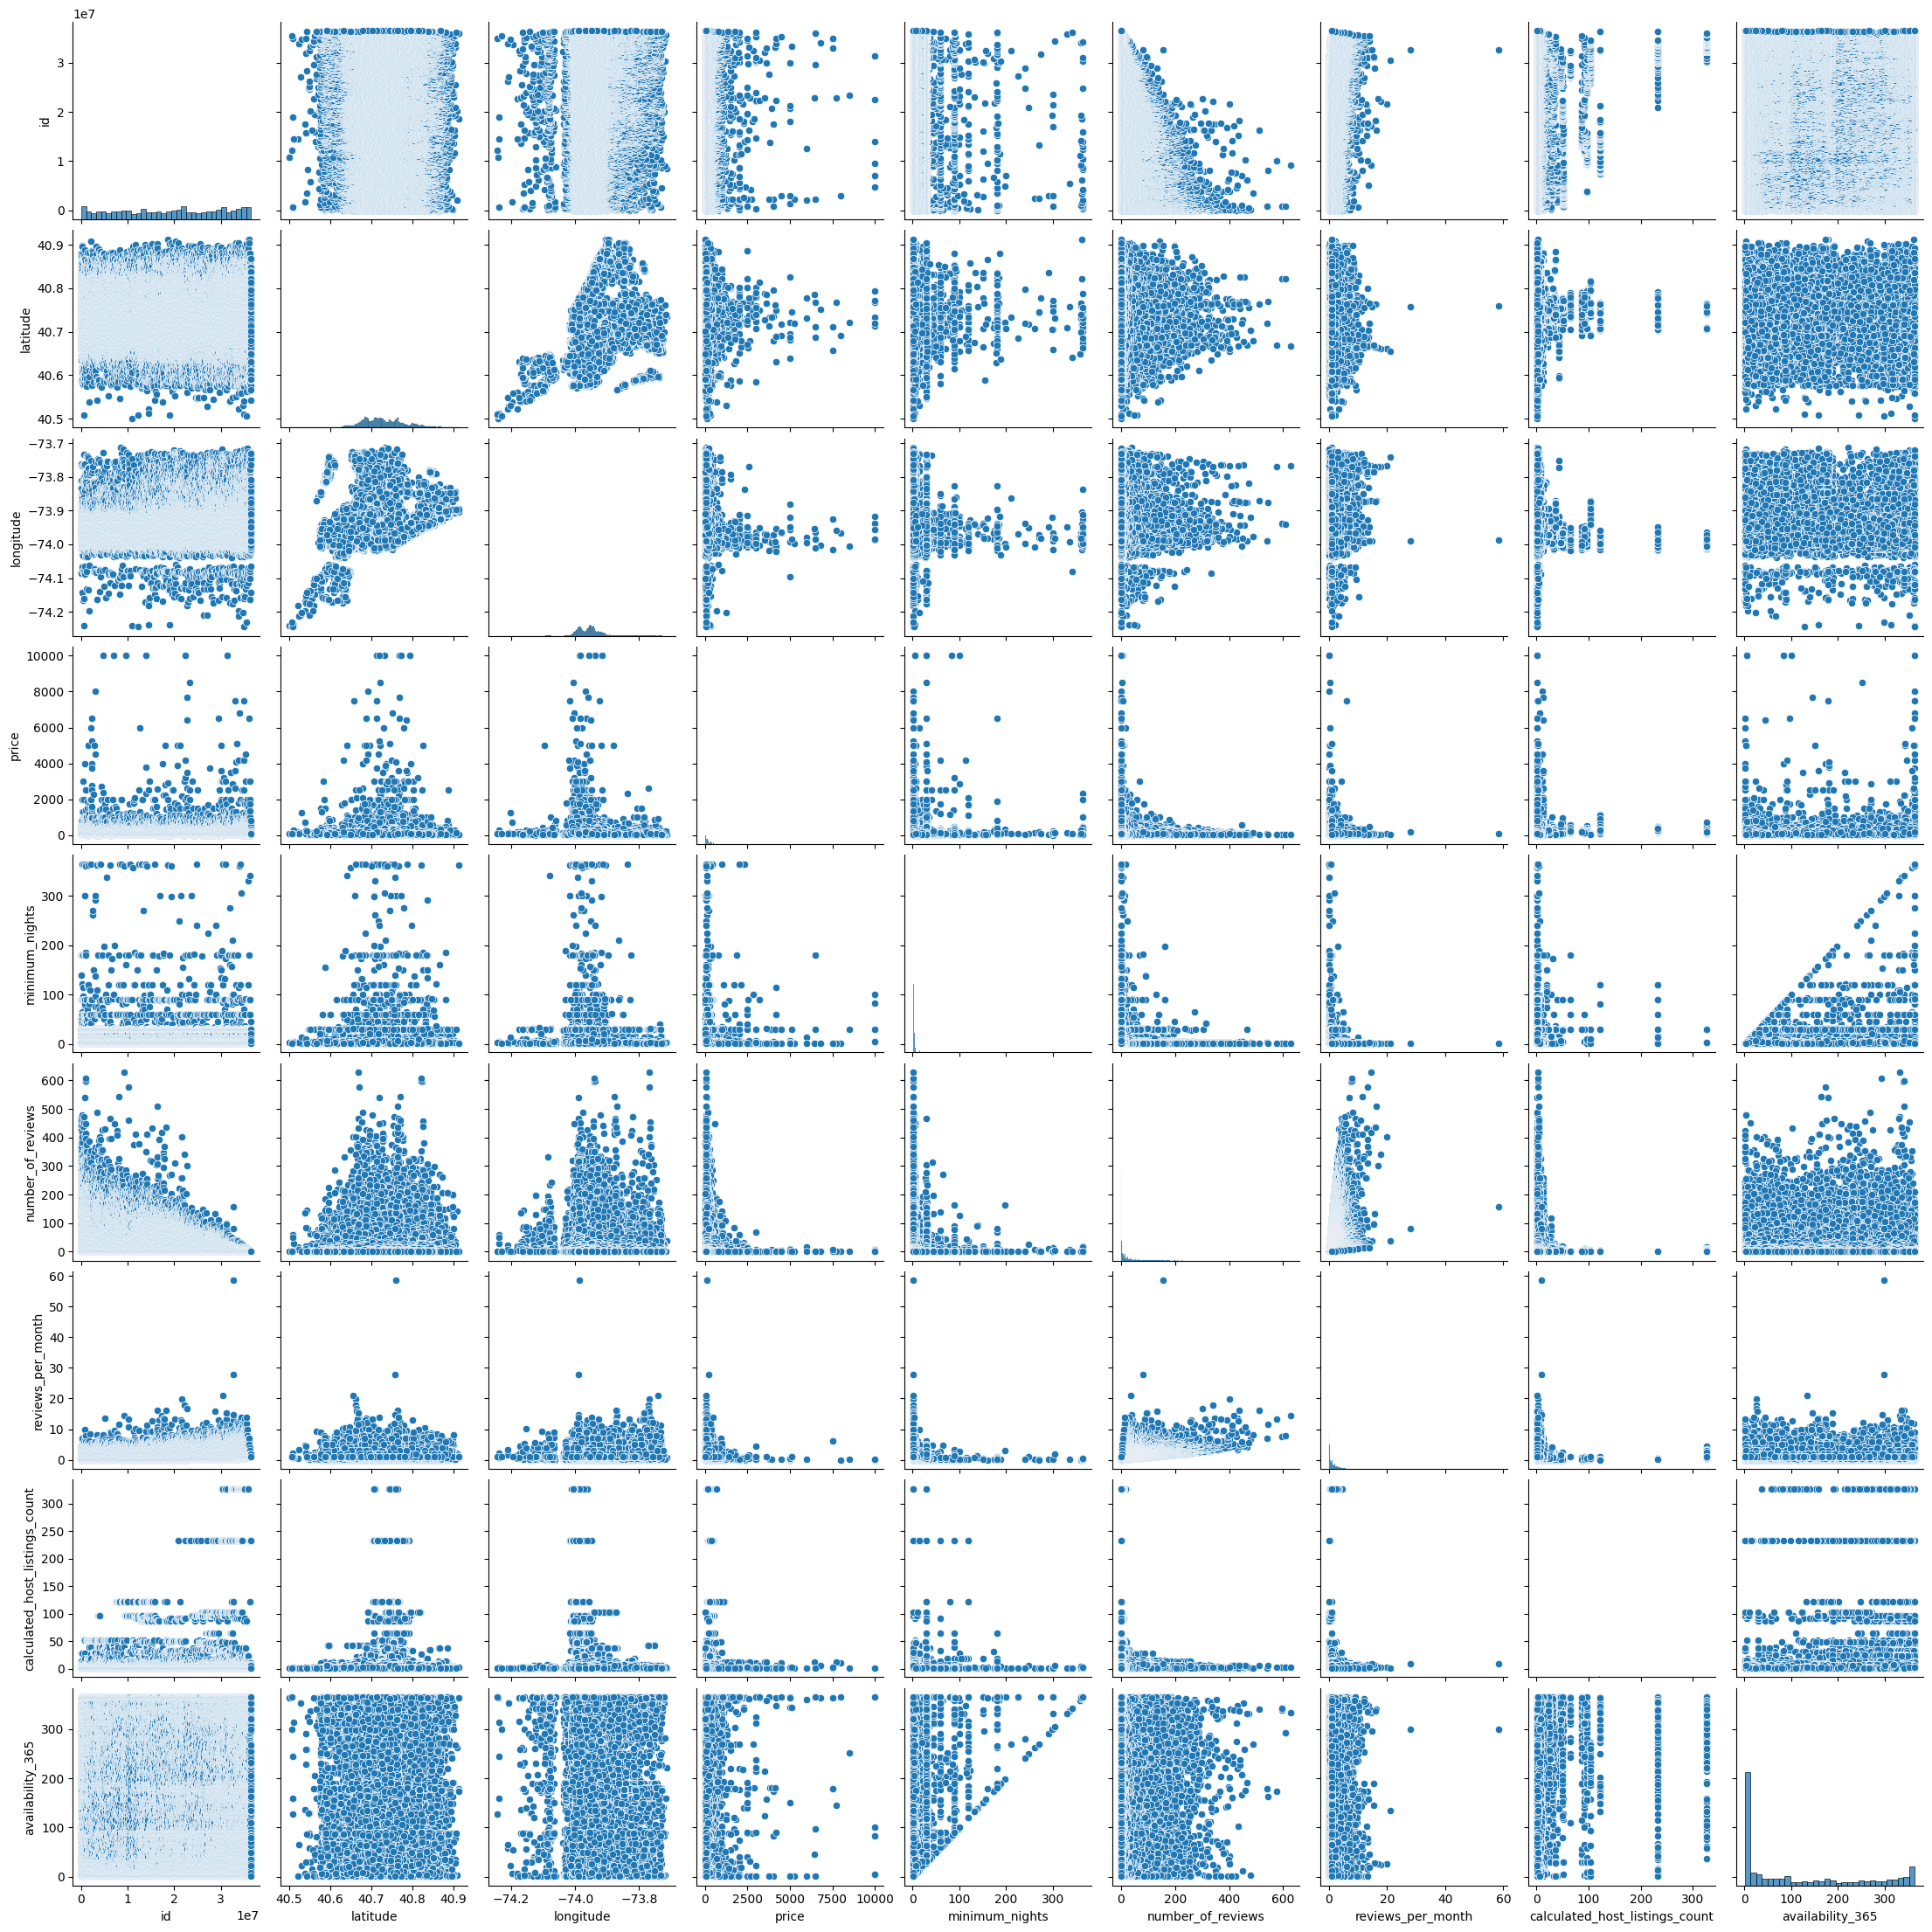

In [197]:
# Pair Plot visualization code
sns.pairplot(df1)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***